In [1]:
import numpy as  np
import seaborn as sb
import pandas as pd 
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
filename = "/content/drive/MyDrive/Upwork/AEPEEGanaylsis/Review paper/audiogramdataonesheet_2.xlsx"

In [4]:
df = pd.read_excel(filename)
df.head()

,Subjects,125Hz,250Hz,500Hz,750Hz,1000Hz,stim,Type
0,Sub_1,18.64,2.04,1.80,1.88,0.48,BMLD,ABR
1,Sub_2,4.88,5.32,3.16,6.96,3.52,BMLD,ABR
2,Sub_3,10.36,13.16,10.36,8.96,5.60,BMLD,ABR
3,Sub_4,7.28,4.28,4.56,3.28,2.08,BMLD,ABR
4,Sub_5,2.24,4.48,5.60,19.60,15.20,BMLD,ABR


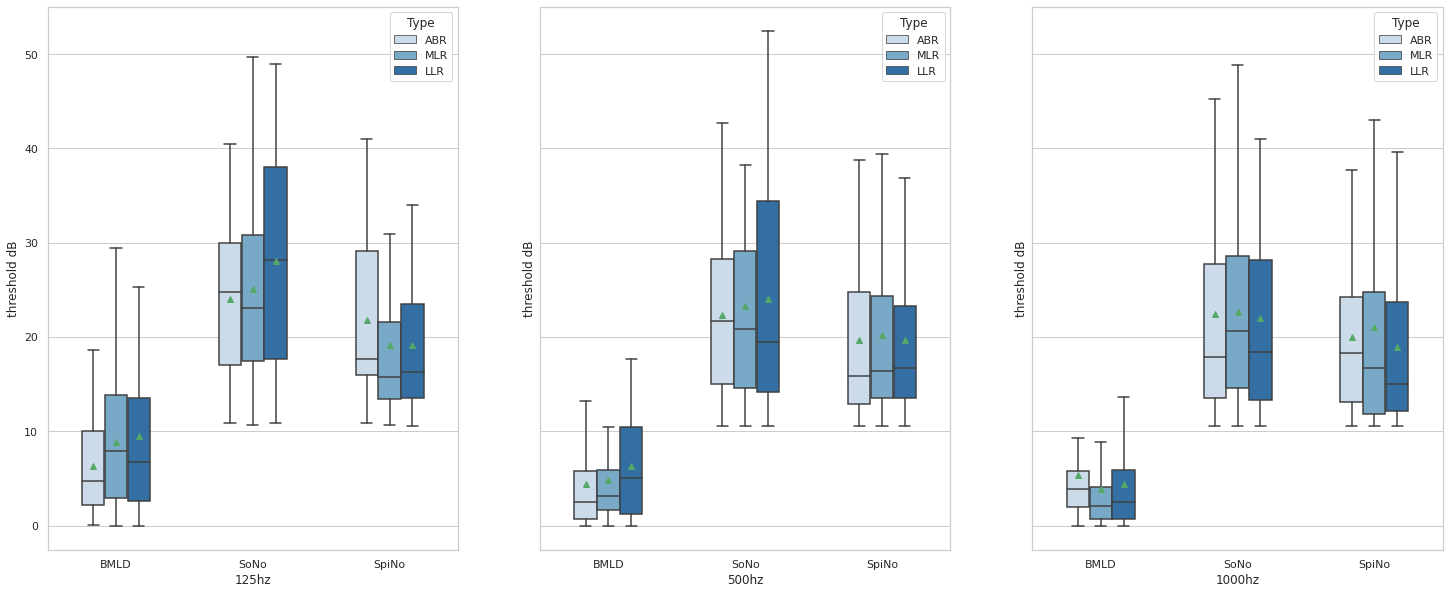

In [15]:
sb.set_theme(style="whitegrid")
f, axs = plt.subplots(1,3,  figsize=(25,10), sharey=True)

p=sb.boxplot( x=df["stim"], y=df["125Hz"],hue=df["Type"] ,showfliers = False,width=0.5,ax=axs[0],showmeans=True,palette="Blues");
p.set( ylabel = "threshold dB", xlabel = "125hz")



p=sb.boxplot( x=df["stim"], y=df["500Hz"],hue=df["Type"] ,showfliers = False,width=0.5,ax=axs[1],showmeans=True,palette="Blues");
p.set( ylabel = "threshold dB", xlabel = "500hz")



p=sb.boxplot( x=df["stim"], y=df["1000Hz"],hue=df["Type"] ,showfliers = False,width=0.5,ax=axs[2],showmeans=True,palette="Blues");
p.set( ylabel = "threshold dB", xlabel = "1000hz")
plt.show()

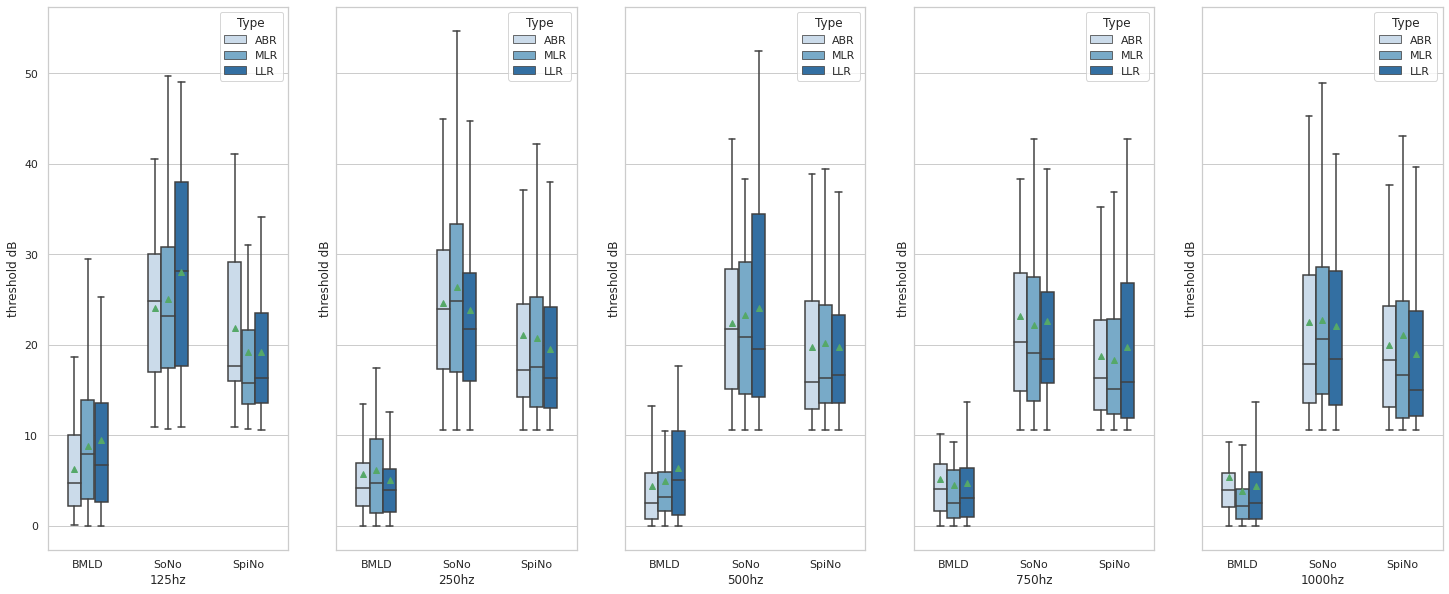

In [14]:
sb.set_theme(style="whitegrid")
f, axs = plt.subplots(1,5,  figsize=(25,10), sharey=True)

p=sb.boxplot( x=df["stim"], y=df["125Hz"],hue=df["Type"] ,showfliers = False,width=0.5,ax=axs[0],showmeans=True,palette="Blues");
p.set( ylabel = "threshold dB", xlabel = "125hz")

p=sb.boxplot( x=df["stim"], y=df["250Hz"],hue=df["Type"] ,showfliers = False,width=0.5,ax=axs[1],showmeans=True,palette="Blues");
p.set( ylabel = "threshold dB", xlabel = "250hz")

p=sb.boxplot( x=df["stim"], y=df["500Hz"],hue=df["Type"] ,showfliers = False,width=0.5,ax=axs[2],showmeans=True,palette="Blues");
p.set( ylabel = "threshold dB", xlabel = "500hz")

p=sb.boxplot( x=df["stim"], y=df["750Hz"],hue=df["Type"] ,showfliers = False,width=0.5,ax=axs[3],showmeans=True,palette="Blues");
p.set( ylabel = "threshold dB", xlabel = "750hz")

p=sb.boxplot( x=df["stim"], y=df["1000Hz"],hue=df["Type"] ,showfliers = False,width=0.5,ax=axs[4],showmeans=True,palette="Blues");
p.set( ylabel = "threshold dB", xlabel = "1000hz")
plt.show()

In [16]:
filename = "/content/drive/MyDrive/Upwork/AEPEEGanaylsis/Review paper/audiogramdataonesheet.xlsx"

In [17]:
df = pd.read_excel(filename)
df.head()

,Unnamed: 0,ABR_125Hz,ABR_125Hz.1,ABR_125Hz.2,MLR_125Hz,MLR_125Hz.1,MLR_125Hz.2,LLR_125Hz,LLR_125Hz.1,LLR_125Hz.2,...,LLR_750Hz.2,ABR_1000Hz,ABR_1000Hz.1,ABR_1000Hz.2,MLR_1000Hz,MLR_1000Hz.1,MLR_1000Hz.2,LLR_1000Hz,LLR_1000Hz.1,LLR_1000Hz.2
0,con,BMLD,SoNo,SpiNo,BMLD,SoNo,SpiNo,BMLD,SoNo,SpiNo,...,SpiNo,BMLD,SoNo,SpiNo,BMLD,SoNo,SpiNo,BMLD,SoNo,SpiNo
1,Sub_1,18.64,35.16,16.52,2.44,14.6,12.16,3.24,17.08,14,...,11.64,0.48,10.76,11.24,0.8,14.76,13.96,0.2,11.2,11.4
2,Sub_2,4.88,13.64,18.52,10.96,22.84,11.88,19.48,31.24,12.6,...,11,3.52,17.24,13.72,14.36,26.2,11.84,7.28,18.36,11.08
3,Sub_3,10.36,30.68,41.04,12.88,36.84,49.72,0,41.6,41.88,...,34.32,5.6,33.76,28.16,10.92,37.68,26.76,0.56,32.08,32.64
4,Sub_4,7.28,24.8,17.52,9.88,21.44,11.56,6.12,19.16,13.2,...,11.44,2.08,13.24,11.16,3.52,15.4,11.88,2.68,13.92,11.24


In [25]:
abrfreq=df.iloc[:, 1::9] 
abrfreq=abrfreq.T
abrfreq=abrfreq.reset_index();
abrfreq.head()

,index,0,1,2,3,4,5,6,7,8,...,26,27,28,29,30,31,32,33,34,35
0,ABR_125Hz,BMLD,18.64,4.88,10.36,7.28,2.24,0.04,24.52,0.04,...,2.2,6.36,10.92,11.48,2.24,3.16,4.76,0.84,2.8,4.08
1,ABR_250Hz,BMLD,2.04,5.32,13.16,4.28,4.48,5.44,6.64,2.48,...,30.32,0.64,4.2,0.28,13.44,2.96,8.12,7.28,10.64,0.8
2,ABR_500Hz,BMLD,1.8,3.16,10.36,4.56,5.6,4,10.36,0.6,...,14,5.56,0.84,0.56,0,0.6,0.04,2.04,1.12,2.48
3,ABR_750Hz,BMLD,1.88,6.96,8.96,3.28,19.6,5.2,4.92,1.32,...,8.68,1,4.72,3.16,4.52,5.32,0.6,0.28,0.56,9
4,ABR_1000Hz,BMLD,0.48,3.52,5.6,2.08,15.2,2.6,13.16,4.32,...,6.72,4.48,5.4,0.84,3.16,0.12,1.8,3.16,2.8,5.92


In [27]:
sb.lineplot(x="index", y="1",
             data=abrfreq)
plt.show()

ValueError: ignored